In [1]:
from google.colab  import files
uploaded = files.upload()

Accuracy: 0.8545984953170582


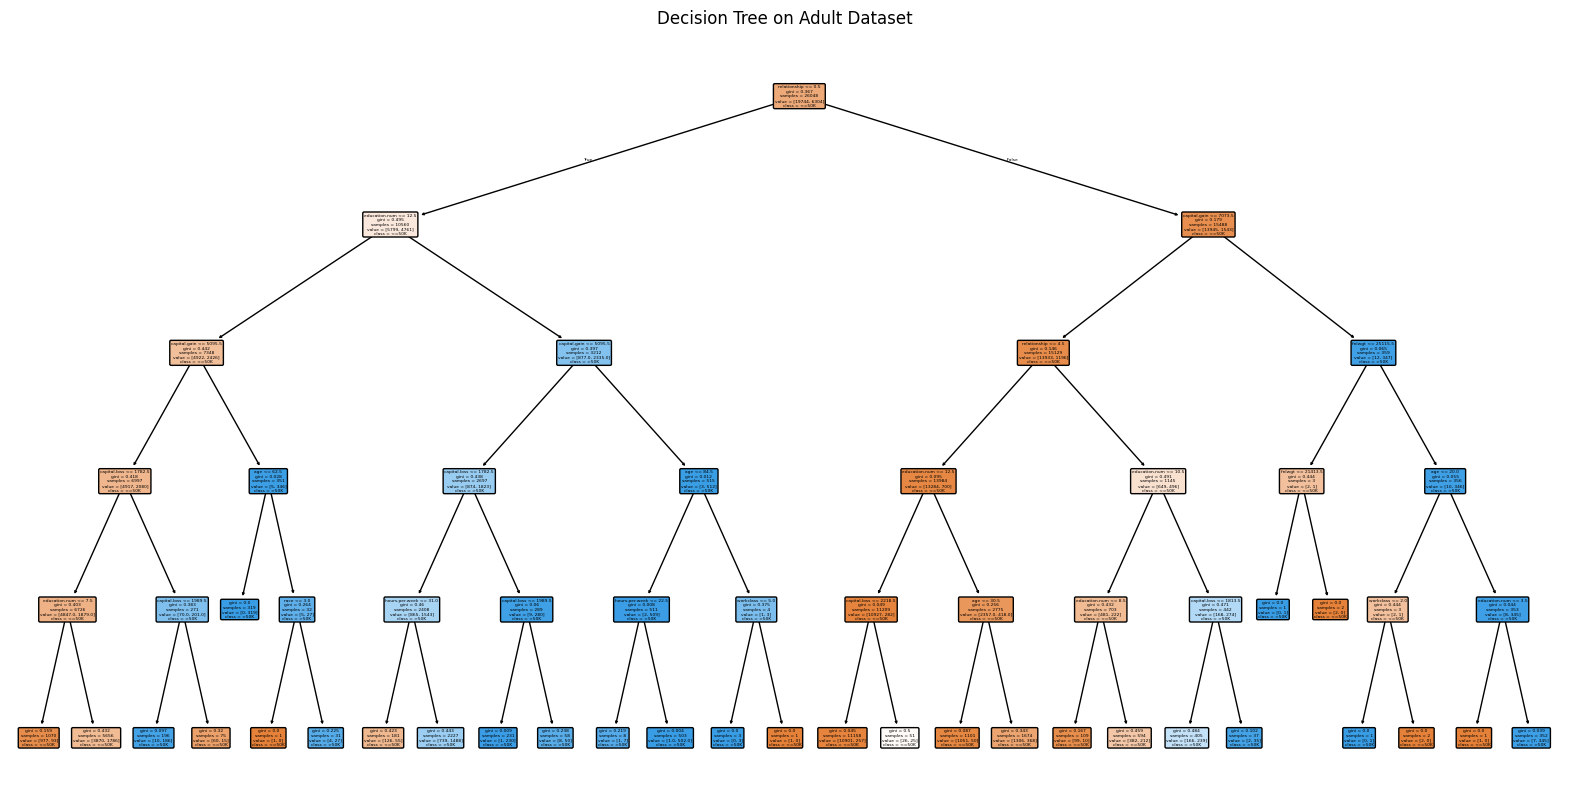

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


df = pd.read_csv("adult.csv")


label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop("income", axis=1)
y = df["income"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(20, 10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=["<=50K", ">50K"],
          rounded=True)
plt.title("Decision Tree on Adult Dataset")
plt.show()